C:\Users\baran\Downloads\duHast\duHast



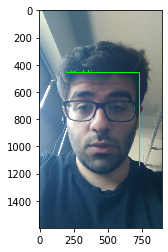

In [5]:
from scipy.spatial.distance import cosine
import numpy as np
import cv2
import mtcnn
from keras.models import load_model
from utils import get_face, plt_show, get_encode, load_pickle, l2_normalizer
import os

print(os.getcwd())
encoder_model = 'facenet_keras.h5'
people_dir = 'data/people'
encodings_path = 'data/encodings/encodings.pkl'
test_img_path = 'data/test/test.jpg'
test_res_path = 'data/results/friends.jpg'

recognition_t = 0.3
required_size = (160, 160)

encoding_dict = load_pickle(encodings_path)
face_detector = mtcnn.MTCNN()
face_encoder = load_model(encoder_model,compile=False)

img = cv2.imread(test_img_path)
# plt_show(img)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = face_detector.detect_faces(img_rgb)
for res in results:
    face, pt_1, pt_2 = get_face(img_rgb, res['box'])
    encode = get_encode(face_encoder, face, required_size)
    encode = l2_normalizer.transform(np.expand_dims(encode, axis=0))[0]

    name = 'unknown'
    distance = float("inf")

    for db_name, db_encode in encoding_dict.items():
        dist = cosine(db_encode, encode)
        if dist < recognition_t and dist < distance:
            name = db_name
            distance = dist
    if name == 'unknown':
        cv2.rectangle(img, pt_1, pt_2, (0, 0, 255), 2)
        cv2.putText(img, name, pt_1, cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)
    else:
        cv2.rectangle(img, pt_1, pt_2, (0, 255, 0), 2)
        cv2.putText(img, name + f'__{distance:.2f}', pt_1, cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 2)

cv2.imwrite(test_res_path, img)
plt_show(img)
